In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('./file.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
None


In [8]:
evsales = pd.read_csv('./file.csv', index_col = 0)
evsales.head()

,category,parameter,mode,powertrain,year,unit,value
region,,,,,,,
Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [9]:
evsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12654 entries, Australia to World
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    12654 non-null  object 
 1   parameter   12654 non-null  object 
 2   mode        12654 non-null  object 
 3   powertrain  12654 non-null  object 
 4   year        12654 non-null  int64  
 5   unit        12654 non-null  object 
 6   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 790.9+ KB


In [10]:
evsales.shape

(12654, 7)

In [11]:
evsales['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010, 2025, 2030, 2035])

In [12]:
evsales.reset_index(inplace = True)
evsales.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [13]:
evsales['region'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [14]:
vehicles = evsales.loc[evsales['unit'] == 'Vehicles']
vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [15]:
display(vehicles.shape)
display(vehicles.describe())

(6842, 8)

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


In [16]:
modes = vehicles['mode'].value_counts()
modes

,count
mode,
Cars,2975
Buses,1485
Vans,1449
Trucks,933


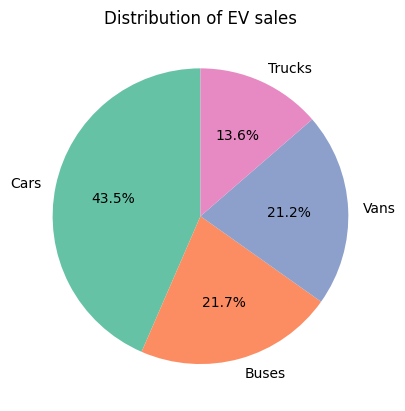

In [17]:
fig, ax = plt.subplots()
ax.pie(modes, labels = modes.index, startangle = 90, autopct='%0.1f%%', colors = plt.cm.Set2.colors)
ax.set_title('Distribution of EV sales');

In [18]:
min_row = vehicles.loc[vehicles['value'].idxmin()]
min_row

,6151
region,Israel
category,Historical
parameter,EV sales
mode,Buses
powertrain,BEV
year,2013
unit,Vehicles
value,0.001


In [19]:
max_row = vehicles.loc[vehicles['value'].idxmax()]
max_row

,12609
region,World
category,Projection-APS
parameter,EV stock
mode,Cars
powertrain,BEV
year,2035
unit,Vehicles
value,440000000.0


In [20]:
vehicles_by_countries = pd.DataFrame(vehicles.groupby(vehicles['region'])['value'].sum())
vehicles_by_countries.reset_index(inplace = True)
vehicles_by_countries.head(10)

,region,value
0,Australia,5.788320e+05
1,Austria,8.719660e+05
2,Belgium,1.687010e+06
3,Brazil,2.649470e+05
4,Bulgaria,4.623000e+03
5,Canada,2.416440e+06
6,Chile,1.445800e+04
7,China,1.148052e+09
8,Colombia,1.602300e+04
9,Costa Rica,2.763100e+04


In [21]:
vehicles_by_countries.columns = ['region', 'total_value']
vehicles_by_countries = vehicles_by_countries[vehicles_by_countries['region'] != 'World']
vehicles_by_countries

,region,total_value
0,Australia,5.788320e+05
1,Austria,8.719660e+05
2,Belgium,1.687010e+06
3,Brazil,2.649470e+05
4,Bulgaria,4.623000e+03
5,Canada,2.416440e+06
6,Chile,1.445800e+04
7,China,1.148052e+09
8,Colombia,1.602300e+04
9,Costa Rica,2.763100e+04


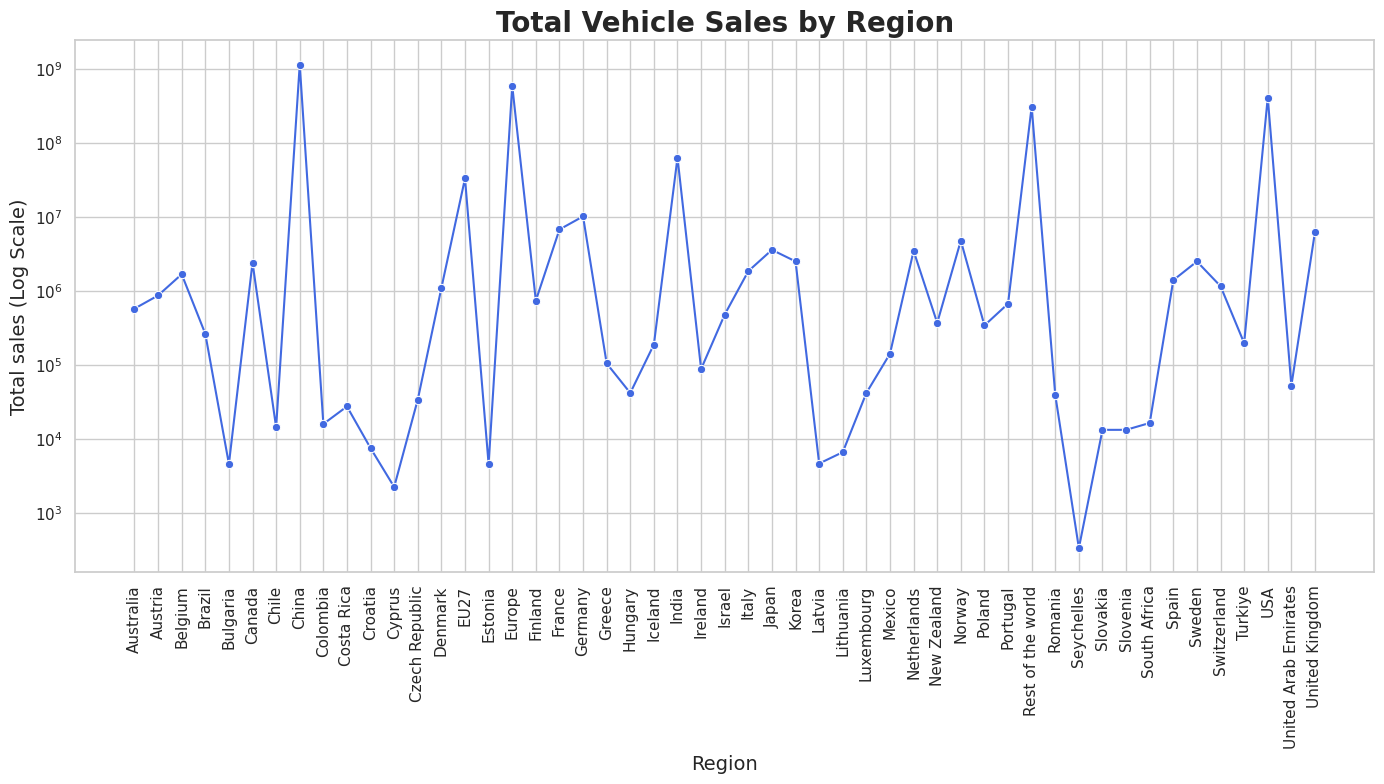

In [22]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (14, 8))
sns.lineplot(x = vehicles_by_countries['region'], y = vehicles_by_countries['total_value'], marker = 'o', color = 'royalblue')
plt.xticks(rotation = 90)
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Total sales (Log Scale)', fontsize = 14)
plt.yscale('log')
plt.tight_layout();

<ipython-input-23-09b2ddec940f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vehicles_by_countries['region'], y = vehicles_by_countries['total_value'], palette = 'viridis')


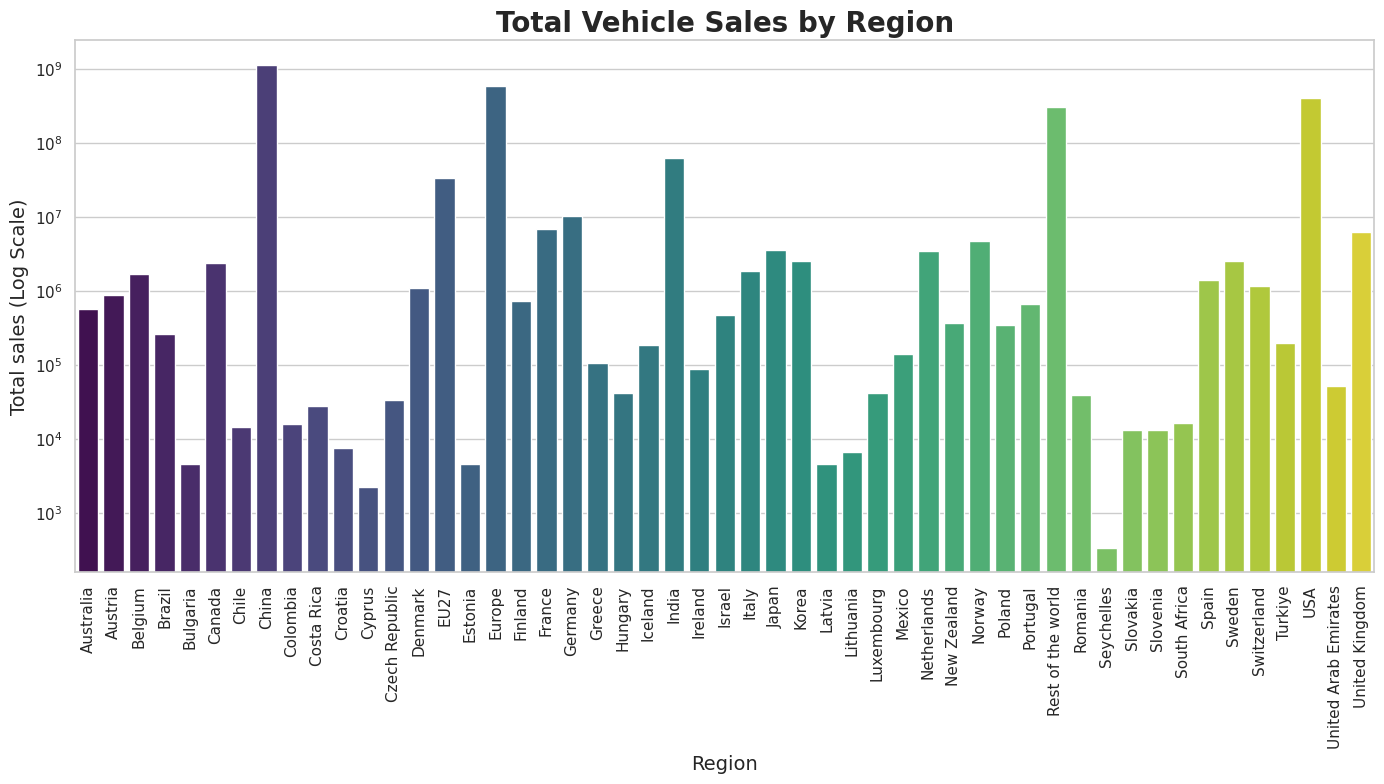

In [23]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x = vehicles_by_countries['region'], y = vehicles_by_countries['total_value'], palette = 'viridis')
plt.xticks(rotation = 90)
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Total sales (Log Scale)', fontsize = 14)
plt.yscale('log')
plt.tight_layout();

In [24]:
vehicles_by_countries_2 = pd.DataFrame(vehicles[vehicles['region'] != 'World'].groupby(vehicles['region'])['value'].sum().sort_values())
vehicles_by_countries_2.reset_index(inplace = True)
vehicles_by_countries_2

,region,value
0,Seychelles,3.380000e+02
1,Cyprus,2.260000e+03
2,Estonia,4.585000e+03
3,Bulgaria,4.623000e+03
4,Latvia,4.687000e+03
5,Lithuania,6.673000e+03
6,Croatia,7.557000e+03
7,Slovakia,1.335100e+04
8,Slovenia,1.336300e+04
9,Chile,1.445800e+04


<ipython-input-25-443662b873b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vehicles_by_countries_2['region'], y = vehicles_by_countries_2['value'].sort_values(), palette = 'viridis')


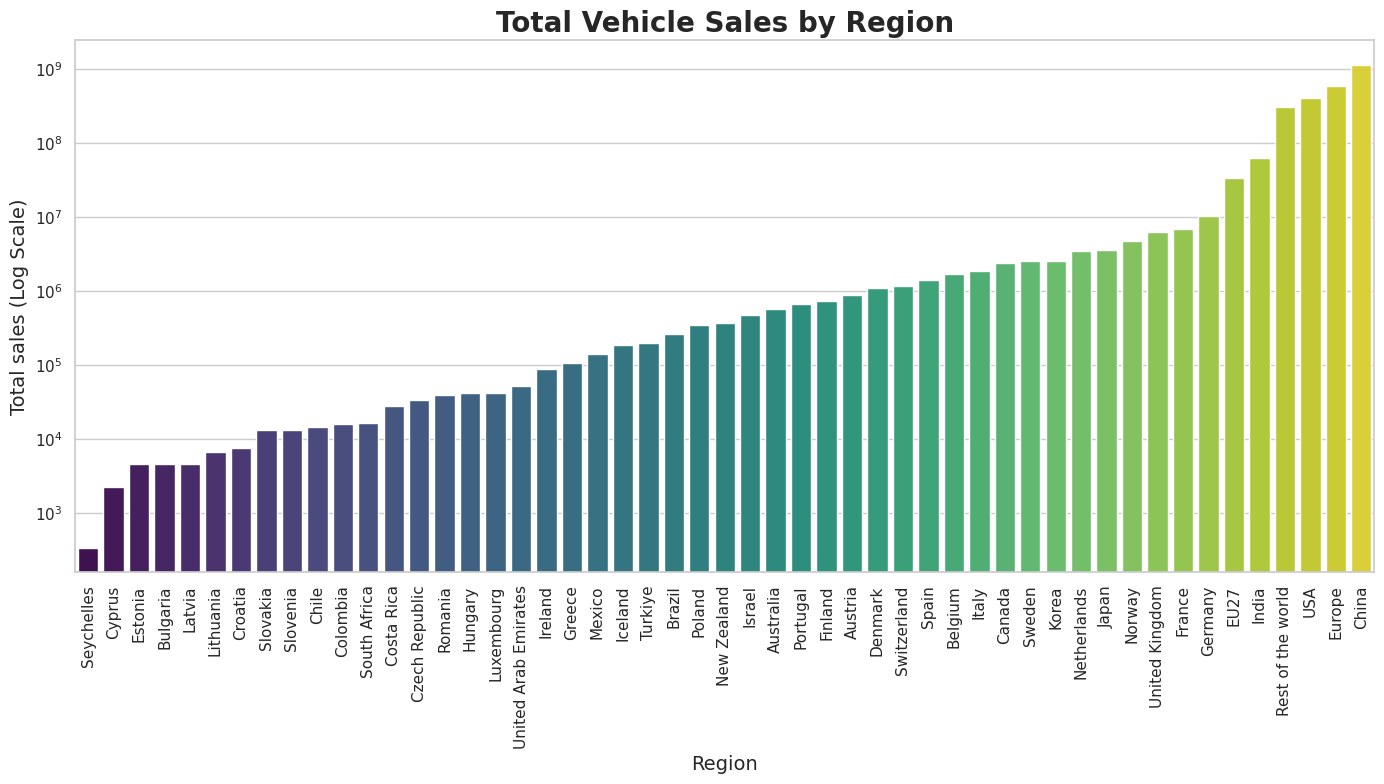

In [25]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x = vehicles_by_countries_2['region'], y = vehicles_by_countries_2['value'].sort_values(), palette = 'viridis')
plt.xticks(rotation = 90)
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Total sales (Log Scale)', fontsize = 14)
plt.yscale('log')
plt.tight_layout();

In [26]:
bottom_10_countries = vehicles_by_countries_2.head(10)
bottom_10_countries

,region,value
0,Seychelles,338.0
1,Cyprus,2260.0
2,Estonia,4585.0
3,Bulgaria,4623.0
4,Latvia,4687.0
5,Lithuania,6673.0
6,Croatia,7557.0
7,Slovakia,13351.0
8,Slovenia,13363.0
9,Chile,14458.0


In [27]:
top_10_countries = vehicles_by_countries.nlargest(10, 'total_value')
top_10_countries

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
35,Norway,4.793634e+06


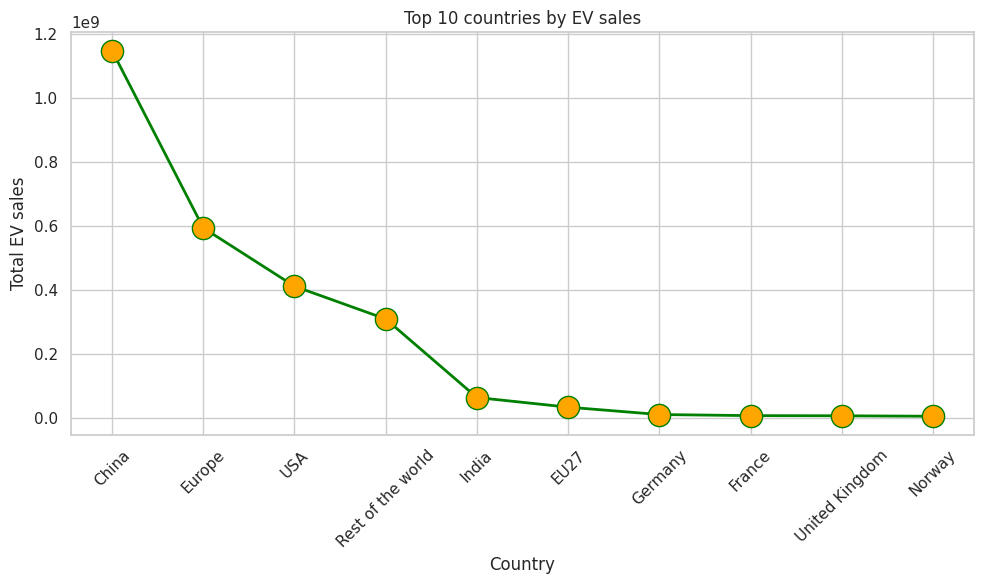

In [28]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set_theme(style = 'whitegrid')
ax.plot(top_10_countries['region'], top_10_countries['total_value'],
        marker = 'o', color = 'green', markerfacecolor = 'orange',
        linestyle = '-', linewidth = 2, markersize = 16)
ax.set_xlabel('Country')
ax.set_ylabel('Total EV sales')

ax.set_title('Top 10 countries by EV sales')
plt.xticks(rotation = 45)

plt.tight_layout();

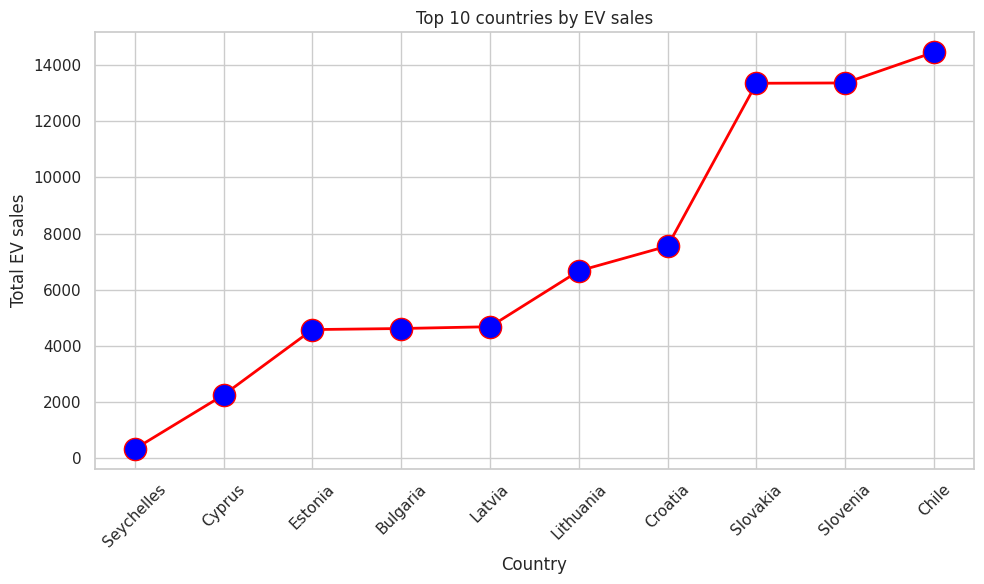

In [29]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set_theme(style = 'whitegrid')
ax.plot(bottom_10_countries['region'], bottom_10_countries['value'],
        marker = 'o', color = 'red', markerfacecolor = 'blue',
        linestyle = '-', linewidth = 2, markersize = 16)
ax.set_xlabel('Country')
ax.set_ylabel('Total EV sales')

ax.set_title('Top 10 countries by EV sales')
plt.xticks(rotation = 45)

plt.tight_layout();

In [30]:
continent_map = {
    'Australia': 'Oceania', 'Austria': 'Europe', 'Belgium': 'Europe', 'Brazil': 'South America',
    'Bulgaria': 'Europe', 'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'EU27': 'Europe', 'Estonia': 'Europe', 'Europe': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Japan': 'Asia', 'Korea': 'Asia', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Mexico': 'North America', 'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Norway': 'Europe',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Rest of the world': 'Other', 'Romania': 'Europe',
    'Seychelles': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa',
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Turkiye': 'Europe', 'USA': 'North America',
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe'
}

vehicles_by_countries['continent'] = vehicles_by_countries['region'].map(continent_map)
vehicles_by_continent = pd.DataFrame(vehicles_by_countries.groupby('continent')['total_value'].sum().reset_index())

In [31]:
vehicles_by_continent.columns = ['continent', 'total_sales']
vehicles_by_continent

,continent,total_sales
0,Africa,1.687100e+04
1,Asia,1.218126e+09
2,Europe,6.717296e+08
3,North America,4.138668e+08
4,Oceania,9.502940e+05
5,Other,3.089968e+08
6,South America,2.954280e+05


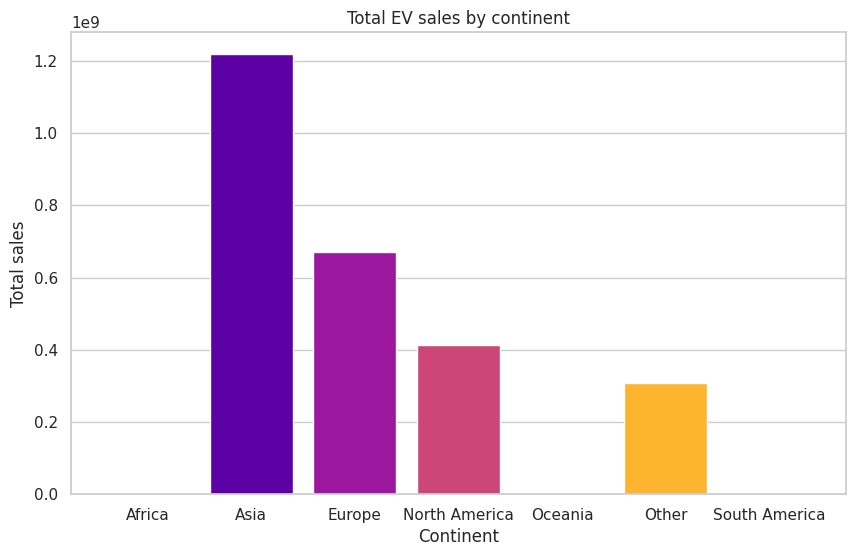

In [34]:
colors = plt.cm.plasma(np.linspace(0, 1, 7))
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(vehicles_by_continent['continent'], vehicles_by_continent['total_sales'], color = colors)
ax.set_title('Total EV sales by continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Total sales')
plt.grid(axis = 'x');

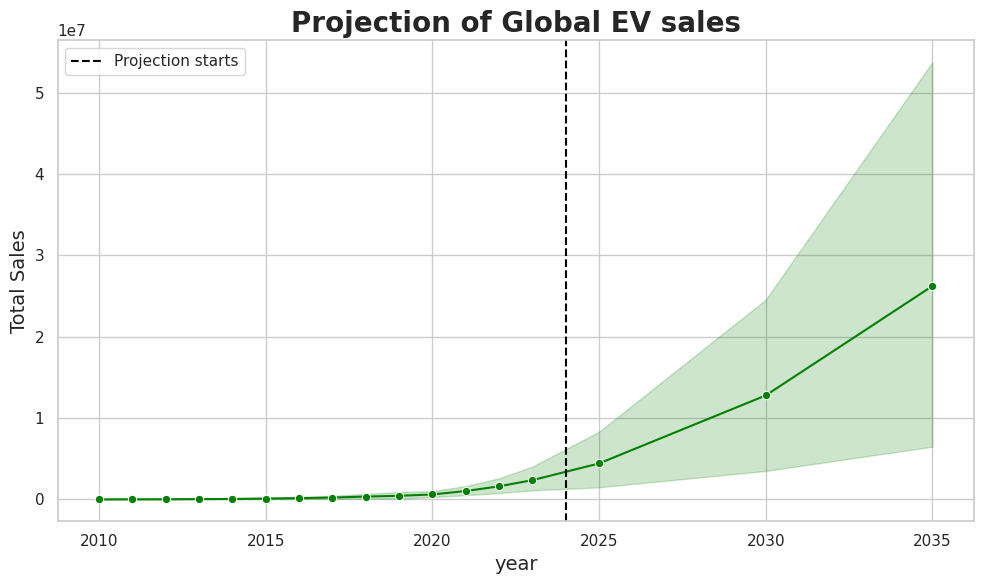

In [37]:
world_data = vehicles[vehicles['region'] == 'World']

sns.set(style= 'whitegrid')

fig, ax = plt.subplots(figsize = (10, 6))

sns.lineplot(data = world_data, x = 'year', y = 'value', marker = 'o', color = 'green')

ax.set_title('Projection of Global EV sales', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('year', fontsize = 14)
ax.set_ylabel('Total Sales', fontsize = 14)

plt.axvline(x = 2024, color = 'black', linestyle = '--', label = 'Projection starts')

plt.tight_layout()
plt.legend()